In [1]:
#.libPaths(c('/usr/share/R/library','/usr/lib64/R/library',''))
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

#### load data & annotations

In [64]:
wholeanno <-read.table('wholeannotation.csv',sep=',',header=T)[seq(1,64),]
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"

In [81]:
wholeanno$Sample_ID

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [129]:
raw_mx <- read.table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/table/hcc_lulab.sequentialMap.featureCounts.merged.name.mx', sep = "\t")
colnames(raw_mx)<-wholeanno$Sample_ID
#anno <- read.table("hcc_lulab.sample.info.txt", sep = "\t", header=T)
#anno$Class <- "Ctrl"
#anno[which(anno$Disease_status=="HCC_before_surgery"),"Class"] <- "HCC"
#mx <- raw_mx[, (names(raw_mx) %in% anno$Sample_ID)]

In [132]:
rowsums <-rowSums(raw_mx)

In [18]:
rowsumind <-order(-rowsums)
top20name <-rownames(raw_mx)[rowsumind[1:20]]

先去除top20

In [83]:
fulltop20 <-c('Y_RNA_ENSG00000201778.1' ,'miRNA_MIR451A', 'miRNA_MIR122', 'miRNA_MIR21', 'miRNA_MIRLET7I',
              'miRNA_MIR148A' ,'miRNA_MIR26A1', 'miRNA_MIR26A2', 'miRNA_MIR486-2' ,'miRNA_MIR486-1' ,'miRNA_MIRLET7G',
              'miRNA_MIR126', 'miRNA_MIR423', 'miRNA_MIRLET7B', 'miRNA_MIR30D' ,'miRNA_MIRLET7F2', 'miRNA_MIR146A' ,
              'miRNA_MIR22', 'miRNA_MIR26B', 'miRNA_MIRLET7F1')


In [5]:
fulltop20 <- c('Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1')

In [84]:
new_raw_mx <-raw_mx[-which(rownames(raw_mx) %in% fulltop20), ]

In [85]:
print (dim(raw_mx))
print (dim(new_raw_mx))

[1] 854770     64
[1] 854750     64


In [86]:
colnames(new_raw_mx)

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507891_B"   "lulab_507909_B"  
[17] "lulab_508877_B"   "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"  
[21] "lulab_515058_B"   "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B"
[25] "lulab_SH327412_B" "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B" 
[29] "lulab_5474594_B"  "lulab_6474170_B"  "lulab_8397116_B"  "lulab_BD.LOW.mix"
[33] "lulab_LY"         "lulab_CXD"        "lulab_Normal_1"   "lulab_Normal_2"  
[37] "lulab_Normal_3"   "lulab_Normal_4"   "lulab_Normal_5"   "lulab_Normal_6"  
[41] "lulab_Normal_7"   "lulab_Normal_8"   "lulab_498187_A"   "lulab_498221_A"  
[45] "lulab_385247_A"   "lulab_498191_A"   "lulab_511122_A"   "lulab_510199_A"  
[49] "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"   "lulab_508955_A"  
[53] "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"   "lulab_510470_A"  
[57] "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A" "lulab_12402567_A"
[61] "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"      "lulab_HBV_3"

In [87]:
wholeanno$Status <- "HD"
wholeanno[which(wholeanno$Stage.BCLC=="A"),"Status"] <- "A"
wholeanno[which(wholeanno$Stage.BCLC=="B"),"Status"] <- "B"
wholeanno[which(wholeanno$Stage.BCLC=="C"),"Status"] <- "C"
wholeanno[which(wholeanno$Disease_status=="HCC_after_surgery"),"Status"] <- "Postoperative"
wholeanno[which(wholeanno$Disease_status=="mixed by 5 HBV"),"Status"] <- "CHB"

In [88]:
length(wholeanno$Status)

[1] 64

#### drop some sample

#### 调整removeind  
<span class="burk">改，后续用use来选sample！</span>

In [13]:
seq(1,64)[wholeanno$sampleuse ==1]

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
[26] 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53
[51] 54 55 56 57 58 59 60 61 62 63 64

In [89]:
wholeanno$Sample_ID[wholeanno$sampleuse ==1]

[1] "lulab_249136_B"   "lulab_385247_B"   "lulab_423976_B"   "lulab_497411_B"  
 [5] "lulab_497497_B"   "lulab_498127_B"   "lulab_498187_B"   "lulab_498221_B"  
 [9] "lulab_507450_B"   "lulab_507468_B"   "lulab_507511_B"   "lulab_507599_B"  
[13] "lulab_507867_B"   "lulab_507887_B"   "lulab_507909_B"   "lulab_508877_B"  
[17] "lulab_508897_B"   "lulab_511030_B"   "lulab_511485_B"   "lulab_515058_B"  
[21] "lulab_515292_B"   "lulab_SH325716_B" "lulab_SH327409_B" "lulab_SH327412_B"
[25] "lulab_SH327428_B" "lulab_17402567_B" "lulab_3497470_B"  "lulab_5474594_B" 
[29] "lulab_6474170_B"  "lulab_8397116_B"  "lulab_LY"         "lulab_CXD"       
[33] "lulab_Normal_1"   "lulab_Normal_2"   "lulab_Normal_3"   "lulab_Normal_4"  
[37] "lulab_Normal_5"   "lulab_Normal_6"   "lulab_Normal_7"   "lulab_Normal_8"  
[41] "lulab_498187_A"   "lulab_498221_A"   "lulab_385247_A"   "lulab_498191_A"  
[45] "lulab_510199_A"   "lulab_333874_A"   "lulab_482592_A"   "lulab_486978_A"  
[49] "lulab_508955_A"   "lulab_509155_A"   "lulab_509442_A"   "lulab_509970_A"  
[53] "lulab_510470_A"   "lulab_515058_A"   "lulab_515292_A"   "lulab_10515058_A"
[57] "lulab_12402567_A" "lulab_13515292_A" "lulab_HBV_1"      "lulab_HBV_2"     
[61] "lulab_HBV_3"

In [90]:
mx <- new_raw_mx[,seq(1,64)[wholeanno$sampleuse ==1]]  #64个sample还剩下remainind个

In [21]:
mx_ <- raw_mx[,seq(1,64)[wholeanno$sampleuse ==1]]  #64个sample还剩下remainind个

<span class="mark">QC sample in another python jupyter, so freeze QC, drop some sample and start from imputation</span>

In [91]:
#print (dim(raw_mx))
print (dim(mx))
#print (dim(withoutaftermx))
# we use mx and withoutaftermx

[1] 854750     61


****************
#### construct singleCellExperiment object

#### 选择mx或withoutaftermx作为接下来的矩阵

In [112]:
mx

,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,lulab_507468_B,⋯,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
miRNA_MIR6859-1,6,25,3,9,10,1,9,8,16,2,⋯,10,11,10,11,7,15,14,12,2,4
miRNA_MIR1302-2,0,1,0,0,1,0,0,0,0,0,⋯,0,2,0,0,2,1,0,0,0,0
miRNA_MIR6859-2,2,21,5,16,13,4,5,6,13,2,⋯,6,8,2,6,5,23,12,13,7,1
miRNA_MIR6723,14,10,13,12,27,12,23,2,87,8,⋯,7,3,7,7,6,2,9,7,9,11
miRNA_MIR200B,13980,704,1986,3382,564,430,2031,664,1031,1295,⋯,483,563,757,848,925,4715,2180,1355,708,781
miRNA_MIR200A,13504,617,1598,3637,760,666,3214,831,1086,1832,⋯,333,592,589,593,655,11148,1790,1946,448,639
miRNA_MIR429,6945,300,962,1691,310,209,1396,279,409,220,⋯,228,282,282,319,296,5304,473,416,144,175
miRNA_MIR6726,3,6,7,15,22,13,30,14,11,13,⋯,3,2,4,7,6,12,15,7,16,10
miRNA_MIR6727,2,4,1,8,6,0,0,6,4,1,⋯,5,1,4,4,0,7,2,8,0,1
miRNA_MIR6808,7,13,6,3,10,5,17,4,13,6,⋯,11,8,6,7,6,16,13,13,18,6


In [143]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx)),
    colData = wholeanno[wholeanno$sampleuse ==1,])
reads

class: SingleCellExperiment 
dim: 854750 61 
metadata(0):
assays(1): counts
rownames(854750): miRNA_MIR6859-1 miRNA_MIR1302-2 ... mRNA_MT-ND6
  mRNA_MT-CYB
rowData names(0):
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(30): X Unnamed..0 ... Class Status
reducedDimNames(0):
spikeNames(0):

In [63]:
reads_ <- SingleCellExperiment(
    assays = list(counts = as.matrix(mx_)),
    colData = wholeanno[wholeanno$sampleuse ==1,])
reads_

class: SingleCellExperiment 
dim: 854770 61 
metadata(0):
assays(1): counts
rownames(854770): miRNA_MIR6859-1 miRNA_MIR1302-2 ... mRNA_MT-ND6
  mRNA_MT-CYB
rowData names(0):
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(30): X Unnamed..0 ... Class Status
reducedDimNames(0):
spikeNames(0):

##### Remove genes that are not expressed in any samples

In [144]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

[1] 105574     61

In [23]:
keep_feature <- rowSums(counts(reads_) > 0) > 0
reads_ <- reads_[keep_feature, ]
dim(reads_)

[1] 105594     61

In [145]:
reads <-  calculateQCMetrics(reads)

In [24]:
reads_ <-  calculateQCMetrics(reads_)

In [95]:
sum(counts(reads)<0)

[1] 0

****************
### filter samples and genes

#### automitic filter

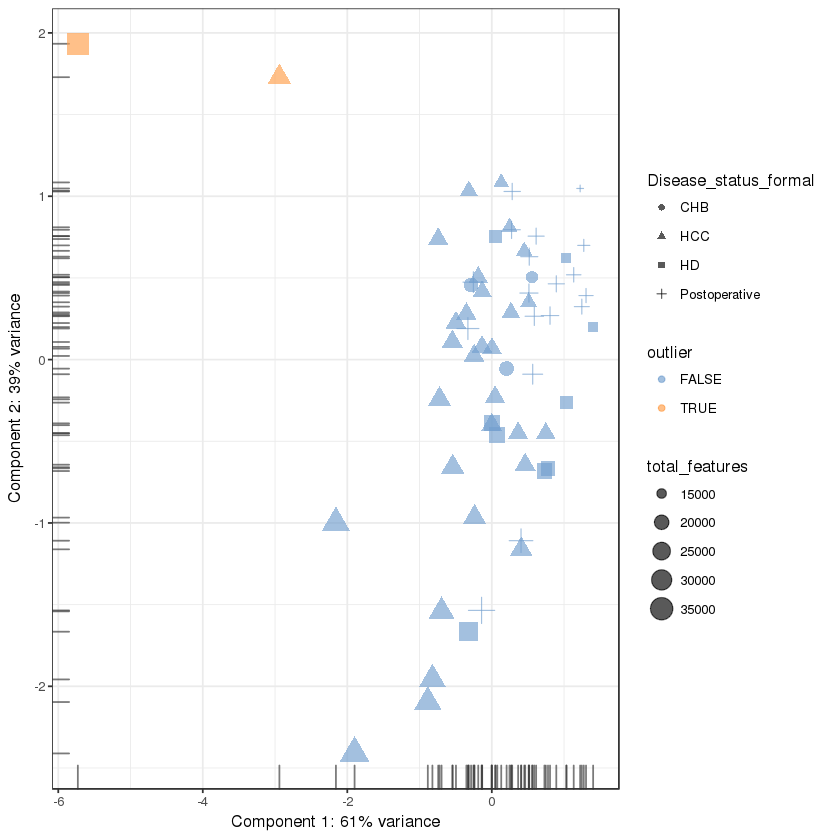

In [25]:
reads <- suppressMessages(plotPCA(
    reads,
    size_by = "total_features",
    shape_by = "Disease_status_formal",
    pca_data_input = "pdata",
    detect_outliers = TRUE,
    return_SCE = TRUE
))

filter_by_outlier <- !reads$outlier

In [26]:
filter_by_outlier

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[61]  TRUE

#### sample filtering

In [146]:
reads$use <-rep(TRUE,dim(reads)[2])

#### gene QC
##### filter genes with too low expression

plotHighestExprs(reads,n=20)

In [97]:
dim(reads_)

[1] 854770     61

In [38]:
counts(reads_)<-counts(reads_)/1000

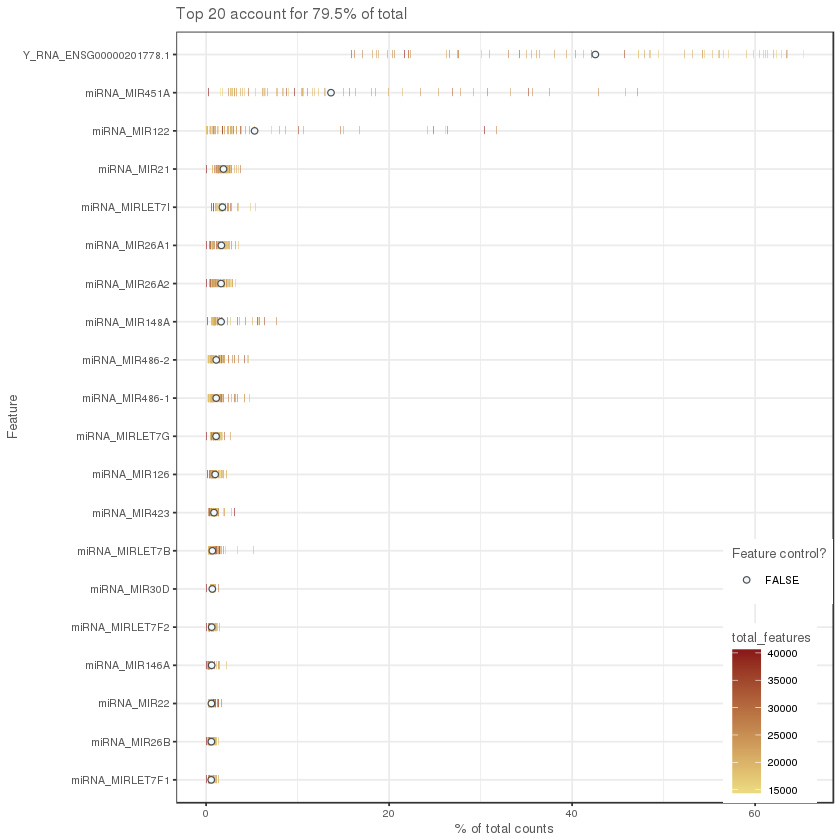

In [40]:
plotHighestExprs(reads_,n=20)

plotQC(reads, type = "highest-expression")

In [164]:
filter_genes <- apply(counts(reads[, colData(reads)$use]), 1, function(x) length(x[x >= 2]) >= 10)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use, colData(reads)$use])

filter_genes
FALSE  TRUE 
80337 25237 

[1] 25237    61

In [177]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use, colData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [178]:
dim(reads.qc)

[1] 25237    61

In [179]:
sum(counts(reads.qc)<0)

[1] 0

In [52]:
# save the data
saveRDS(reads.qc, file = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim61sample.rds")
write.csv(counts(reads.qc), "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim61sample.rds.csv")

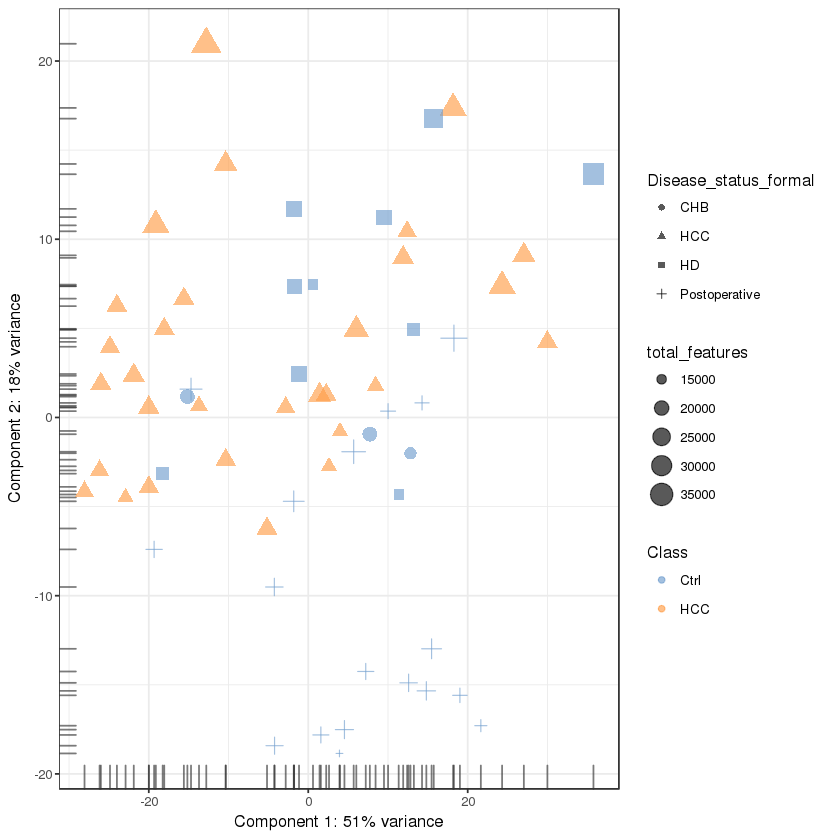

In [32]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

## imputation

In [33]:
dim(reads.qc)

[1] 23827    61

In [35]:
suppressMessages(library("scImpute"))
reads.qc <- readRDS("05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim43sample.rds")
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

In [36]:
sum(counts(reads.qc)<0)

[1] 0

### cluster num?
两类或者五类？

In [38]:
scimpute(count_path = "05.matrix/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim61sample.rds.csv", infile = "csv", 
         outfile = "txt", out_dir = "05.matrix/imputation/", Kcluster = 2, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 23827"
[1] "number of cells in raw count matrix 61"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "writing imputed count matrix ..."


integer(0)

In [39]:
res.qc <- read.table("05.matrix/imputation/scimpute_count.txt")
reads.qc.impute <- SingleCellExperiment(assays = list(counts = as.matrix(res.qc)), colData = colData(reads.qc))
reads.qc.impute <- calculateQCMetrics(reads.qc.impute)


In [40]:
assay(reads.qc.impute, "logcounts_raw") <- log2(counts(reads.qc.impute) + 1)

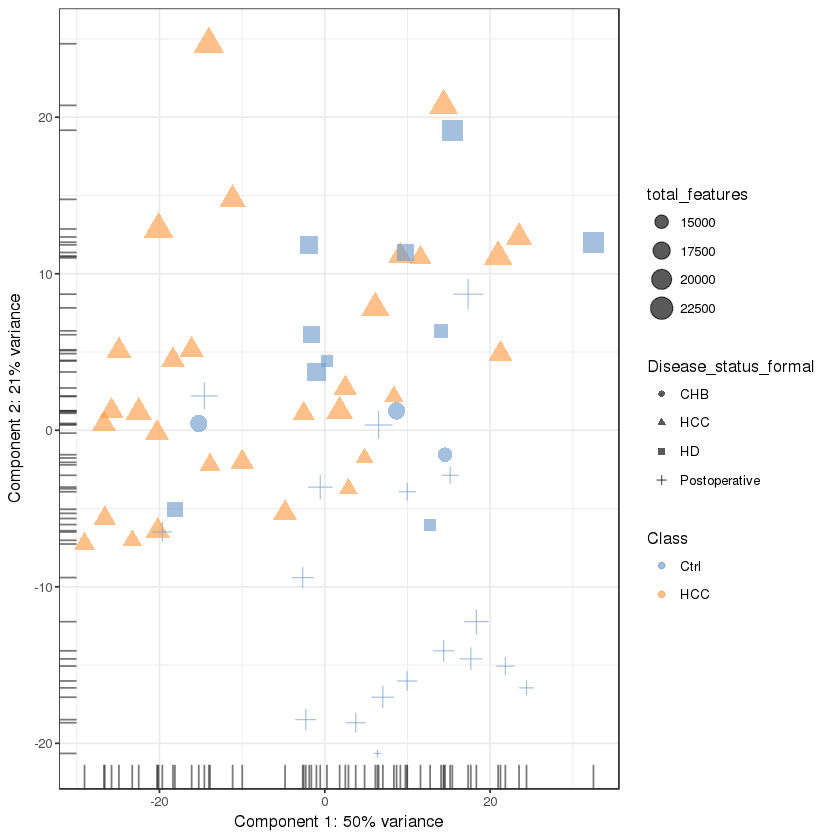

In [41]:
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

In [42]:
head(counts(reads.qc.impute))
saveRDS(counts(reads.qc.impute), file = "05.matrix/imputation/hcc_lulab.sequentialMap.homer.merged.clean.fulllengthnotrim.rds")

,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,lulab_507468_B,⋯,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
miRNA_ENSG00000278267.1,6,25,3,9,10,1,9,9,16,2,⋯,10,11,10,11,7,15,14,12,2,4
miRNA_ENSG00000273874.1,2,21,5,16,13,4,5,6,13,2,⋯,6,8,2,6,5,23,12,13,7,1
miRNA_ENSG00000278791.1,14,10,13,12,18,12,23,0,21,7,⋯,7,3,8,3,6,5,8,7,7,7
miRNA_ENSG00000207730.3,13983,704,1988,3383,566,432,2032,666,1031,1300,⋯,483,563,758,848,926,4715,2181,1355,711,782
miRNA_ENSG00000207607.3,13509,617,1599,3639,760,666,3216,832,1086,1837,⋯,333,592,589,593,655,11151,1790,1950,449,640
miRNA_ENSG00000198976.1,6948,300,965,1691,310,209,1397,280,409,220,⋯,229,282,282,320,296,5304,474,417,144,176


In [168]:
assay(reads.qc, "logcounts_raw") <- log2(counts(reads.qc) + 1)

**********************
## normalization

In [180]:
reads.qc
#counts logcounts_raw 是取log2的

class: SingleCellExperiment 
dim: 25237 61 
metadata(0):
assays(2): counts logcounts_raw
rownames(25237): miRNA_MIR6859-1 miRNA_MIR6859-2 ... mRNA_MT-ND6
  mRNA_MT-CYB
rowData names(9): is_feature_control mean_counts ... log10_total_counts
  use
colnames(61): lulab_249136_B lulab_385247_B ... lulab_HBV_2 lulab_HBV_3
colData names(39): X Unnamed..0 ... pct_counts_top_500_features
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [181]:
sum(counts(reads.qc)<0)

[1] 0

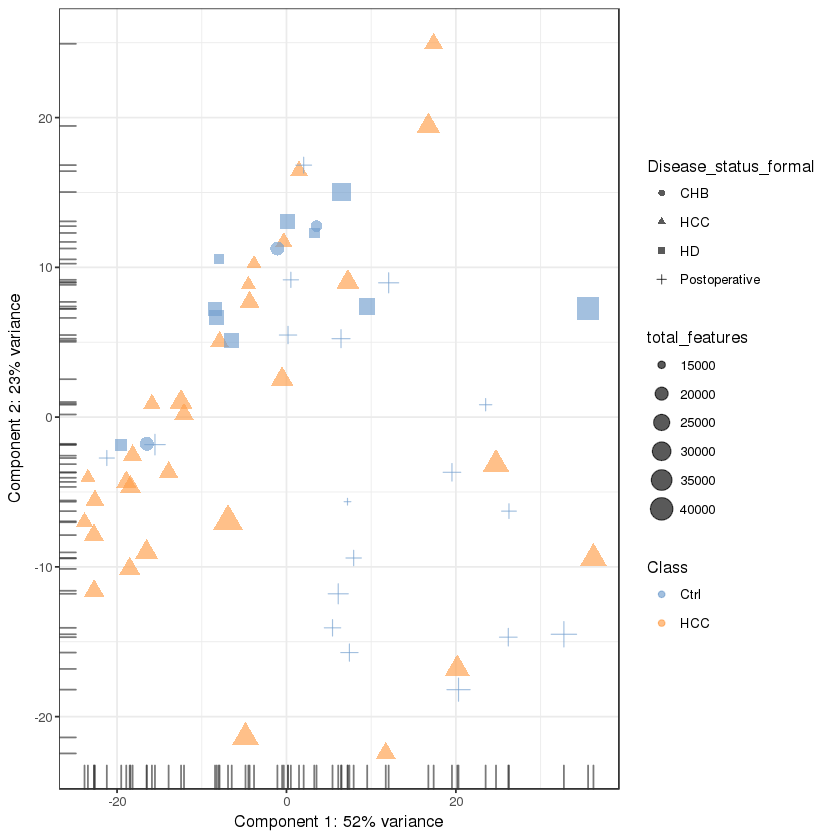

In [182]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features"
)

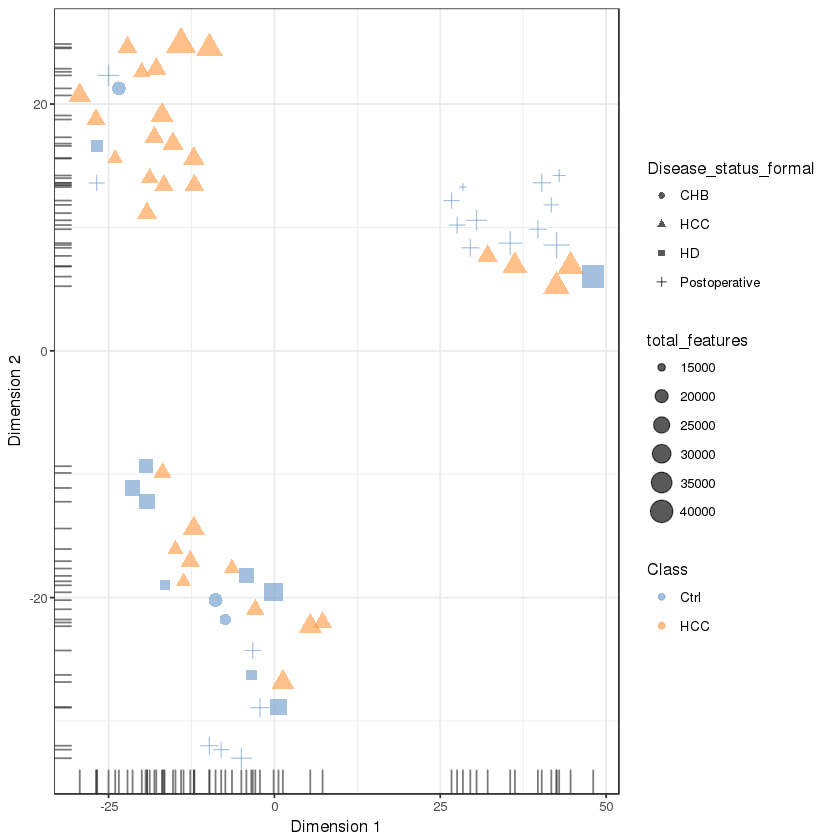

In [183]:
plotTSNE(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 300
)

In [184]:
dim(counts(reads.qc))

[1] 25237    61

In [185]:
# CPM
logcounts(reads.qc) <- log2(calculateCPM(reads.qc, use.size.factors = FALSE) + 1)

In [189]:
# scran (CPM)
library(scran)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}

# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="HCC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc <- computeSumFactors(reads.qc, sizes = 5, clusters = sampleLables)
reads.qc <- normalize(reads.qc)

Warning message in .computeSumFactors(assay(x, i = assay.type), subset.row = subset.row, :
“encountered negative size factor estimates”

In [190]:
dim(reads.qc)

[1] 25237    61

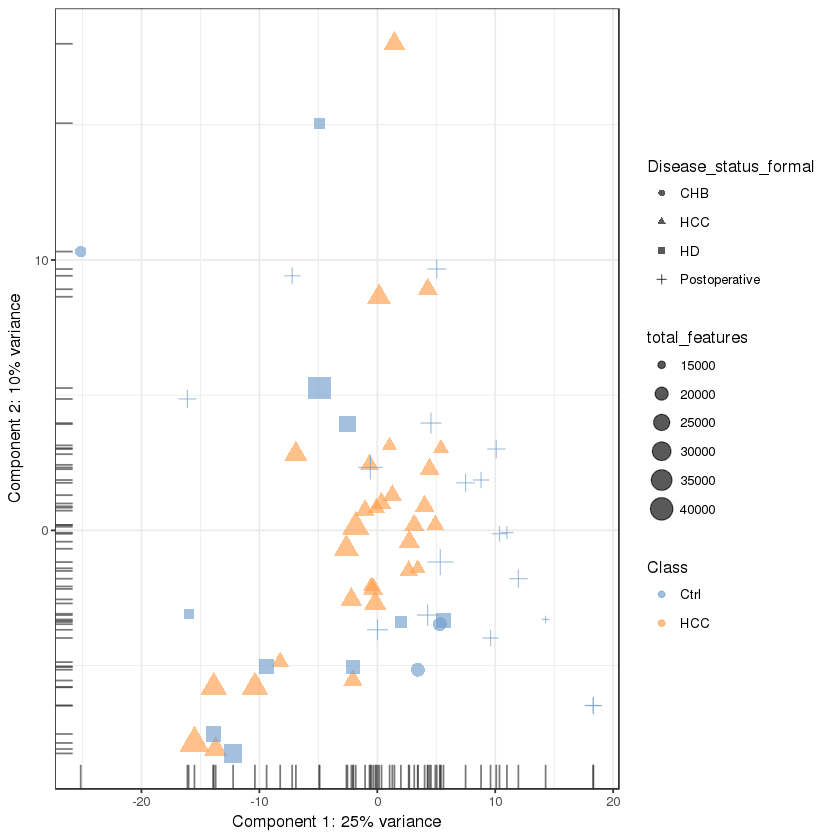

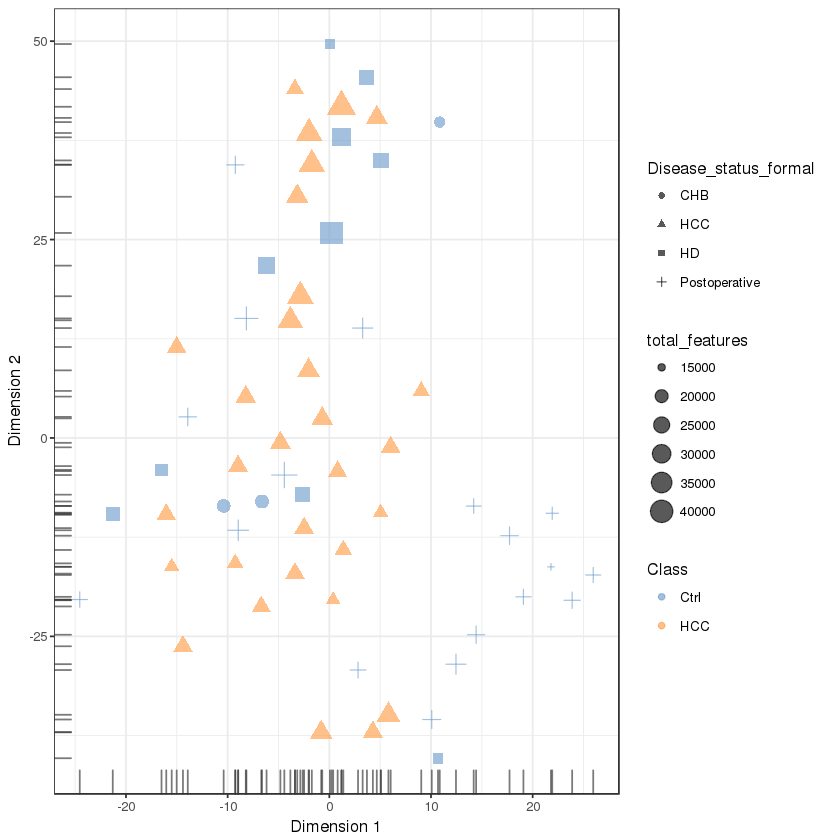

In [196]:
plotPCA(
    reads.qc,
    exprs_values = "logcounts",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop = 300
)

plotTSNE(
    reads.qc,
    exprs_values = "logcounts",
    check_duplicates = FALSE,
    perplexity = 8,
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    rand_seed = 123456,
    ntop = 1000
)

plotRLE(
    reads.qc.impute,
    exprs_mats = list(Raw = "counts", scran = "logcounts"),
    exprs_logged = c(TRUE, TRUE),
    colour_by = "Disease_status",
    legend = "auto"
)

### save data after normalization

In [197]:
write.csv(raw_mx[which(rownames(raw_mx) %in% fulltop20), ],'05.matrix/forfeatureselectionbynorm_61samplefulltop20.csv')

In [198]:
inputF1 <- t(assay(reads.qc, i="logcounts"))
write.csv(data.frame(sampleID = rownames(inputF1), lables = sampleLables, inputF1),'05.matrix/forfeatureselectionbynorm_61samplefull.csv')


In [199]:
dim(inputF1)

[1]    61 25237

In [162]:
dim(reads.qc)

[1] 105574     61

***********************
## Dealing with confounders

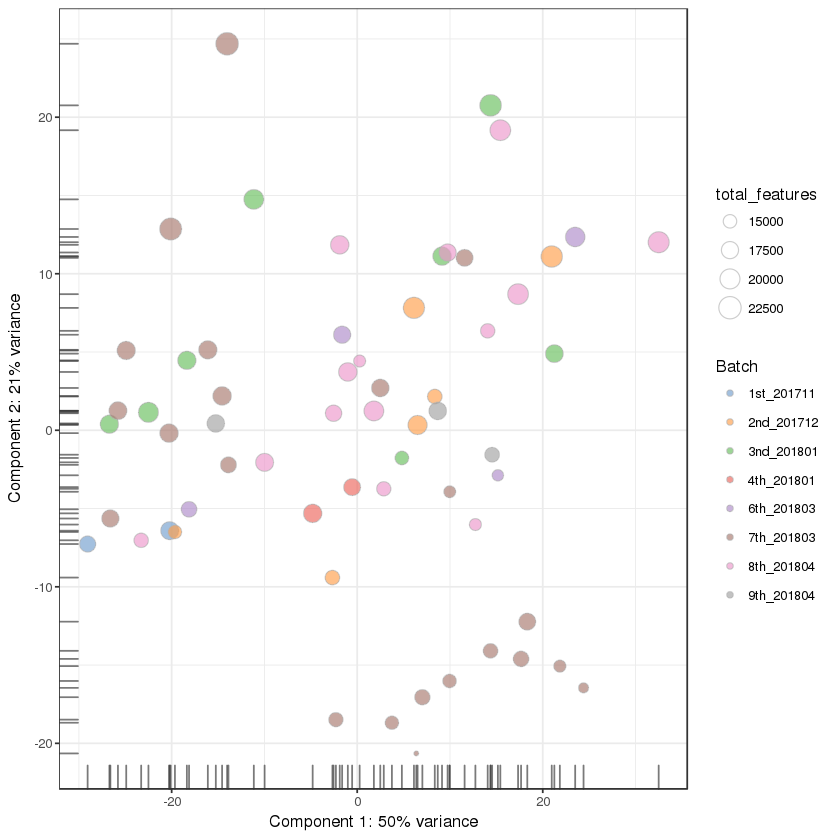

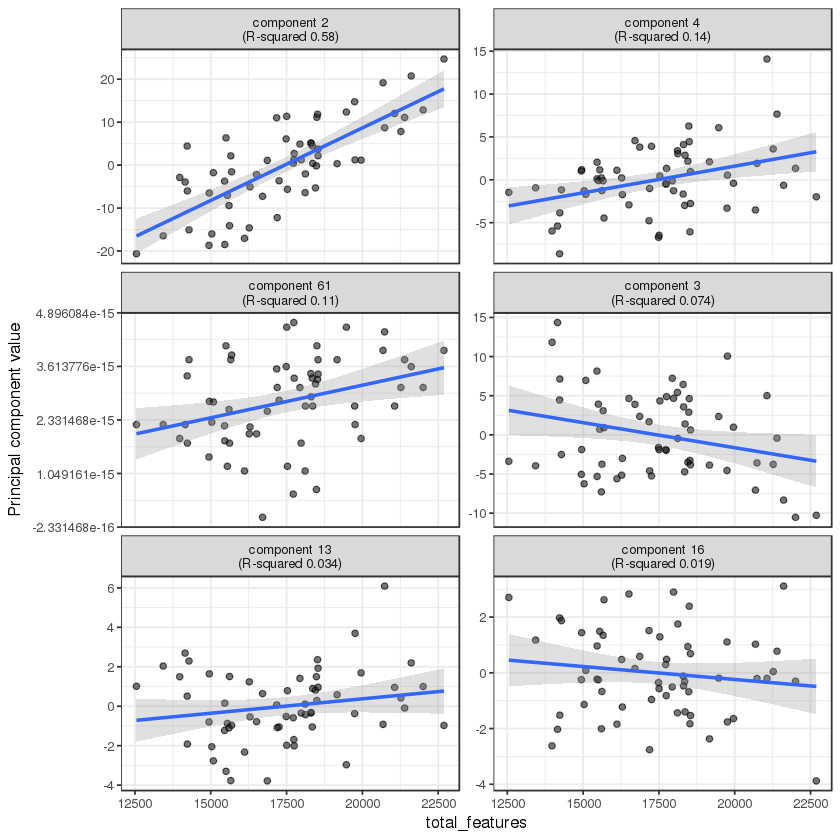

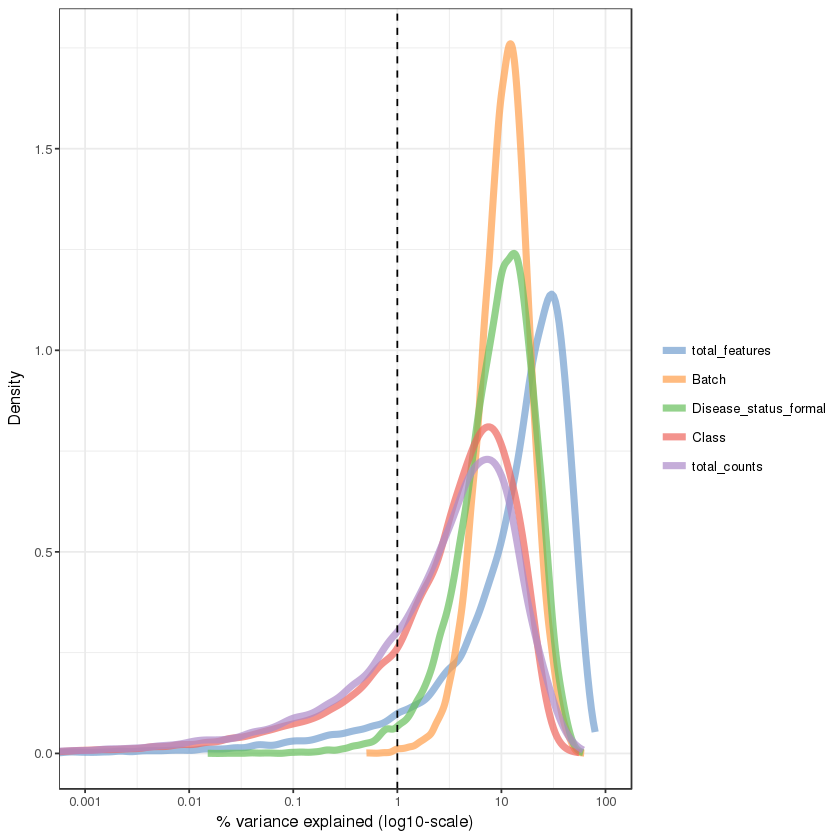

In [60]:
## check confounders
plotPCA(
    reads.qc.impute[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Batch",
    size_by = "total_features"
)
plotQC(
    reads.qc.impute[endog_genes, ],
    type = "find-pcs",
    exprs_values = "logcounts_raw",
    variable = "total_features"
)

plotQC(
    reads.qc.impute[endog_genes, ],
    type = "expl",
    exprs_values = "logcounts_raw",
    variables = c(
        "total_features",
        "total_counts",
        "Batch",
        "Disease_status_formal",
        "Class"
    )
)

In [62]:
library(EDASeq)
library(RUVSeq)
library(sva)
library(scRNA.seq.funcs)

In [110]:
scIdx <- matrix(-1, ncol = max(table(wholeanno$Status)), nrow = 5)
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "A")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "B")
scIdx[2, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "C")
scIdx[3, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1] == "HD")
scIdx[4, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Status[wholeanno$sampleuse ==1]== "CHB")
scIdx[5, 1:length(tmp)] <- tmp
cIdx <- rownames(reads.qc.impute)

In [85]:
scIdx

1,2,4,8,9,11,13,14,16,17,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,6,7,10,12,15,19,21,24,27,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,18,22,28,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31,32,33,34,35,36,37,38,39,40,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
59,60,61,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [111]:
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

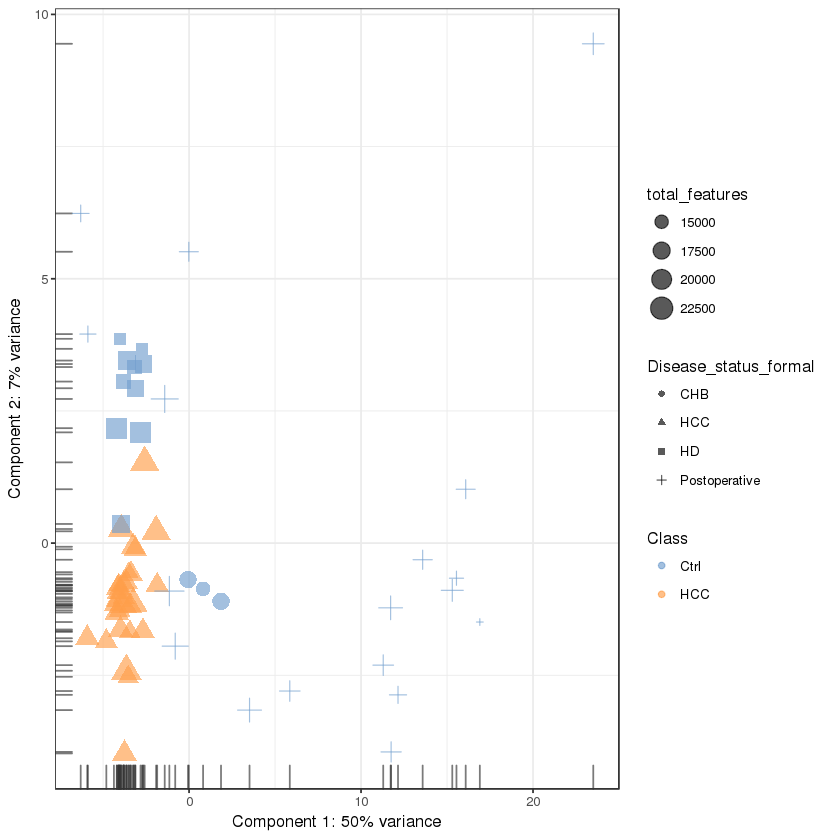

In [112]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop=100
)

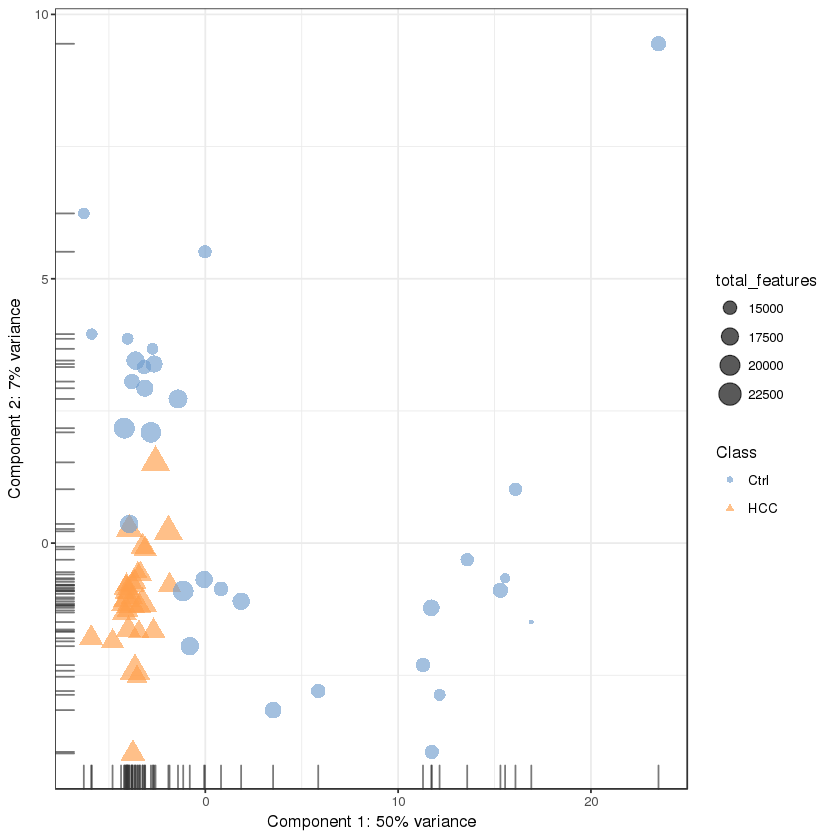

In [113]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)

In [114]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 2)
tmp <- which(wholeanno$Class[wholeanno$sampleuse ==1] == "HCC")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(wholeanno$Class[wholeanno$sampleuse ==1] == "Ctrl")
scIdx[2, 1:length(tmp)] <- tmp

cIdx <- rownames(reads.qc.impute)
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

In [115]:
wholeanno$Class[wholeanno$sampleuse ==1]

[1] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[11] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[21] "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC"  "HCC" 
[31] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[41] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[51] "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl" "Ctrl"
[61] "Ctrl"

In [106]:
scIdx

1,2,3,4,5,6,7,8,9,10,⋯,22,23,24,25,26,27,28,29,30,-1
31,32,33,34,35,36,37,38,39,40,⋯,52,53,54,55,56,57,58,59,60,61


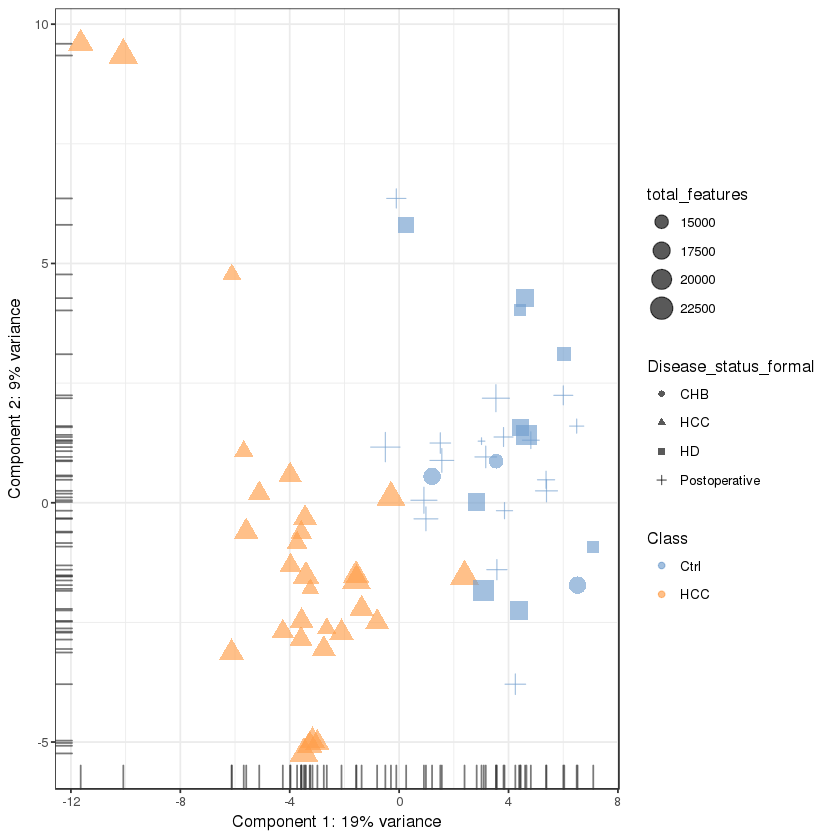

In [104]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Disease_status_formal",
    size_by = "total_features",
    ntop=100
)

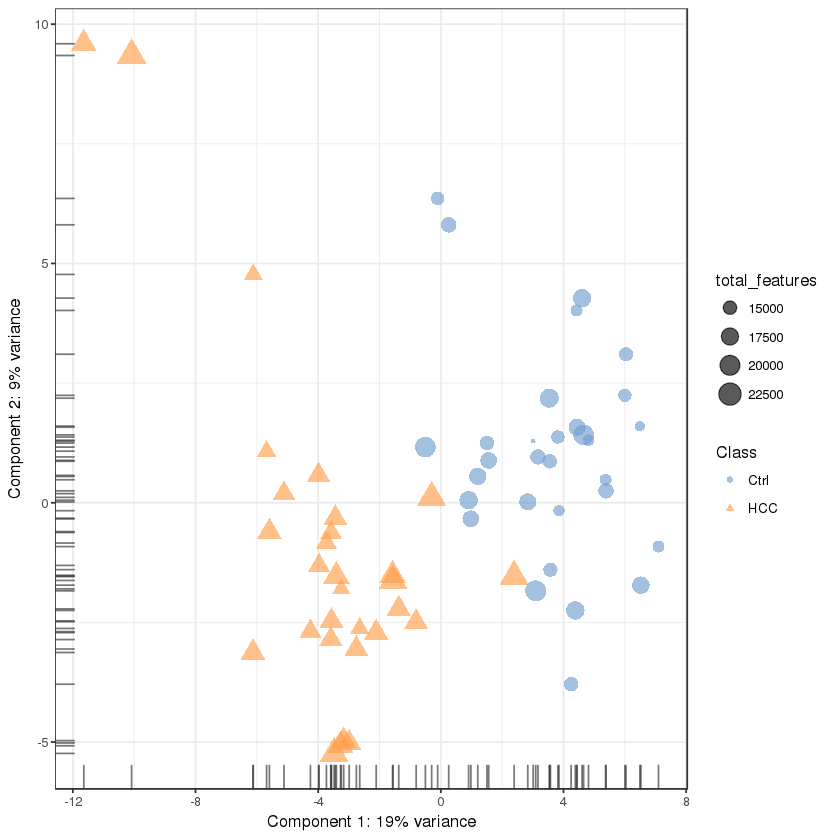

In [105]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)

#### test random

In [107]:
scIdx

1,2,3,4,5,6,7,8,9,10,⋯,22,23,24,25,26,27,28,29,30,-1
31,32,33,34,35,36,37,38,39,40,⋯,52,53,54,55,56,57,58,59,60,61


In [117]:
V<-seq(1:61)
set.seed(001) # just to make it reproducible
V<-sample(V)

In [120]:
scIdx <- matrix(-1, ncol = max(table(reads.qc.impute$Class)), nrow = 2)

scIdx[1, 1:30] <- V[1:30]
scIdx[2, 1:31] <- V[31:61]

cIdx <- rownames(reads.qc.impute)
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc.impute), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc.impute, "ruvs20") <- ruvs$normalizedCounts

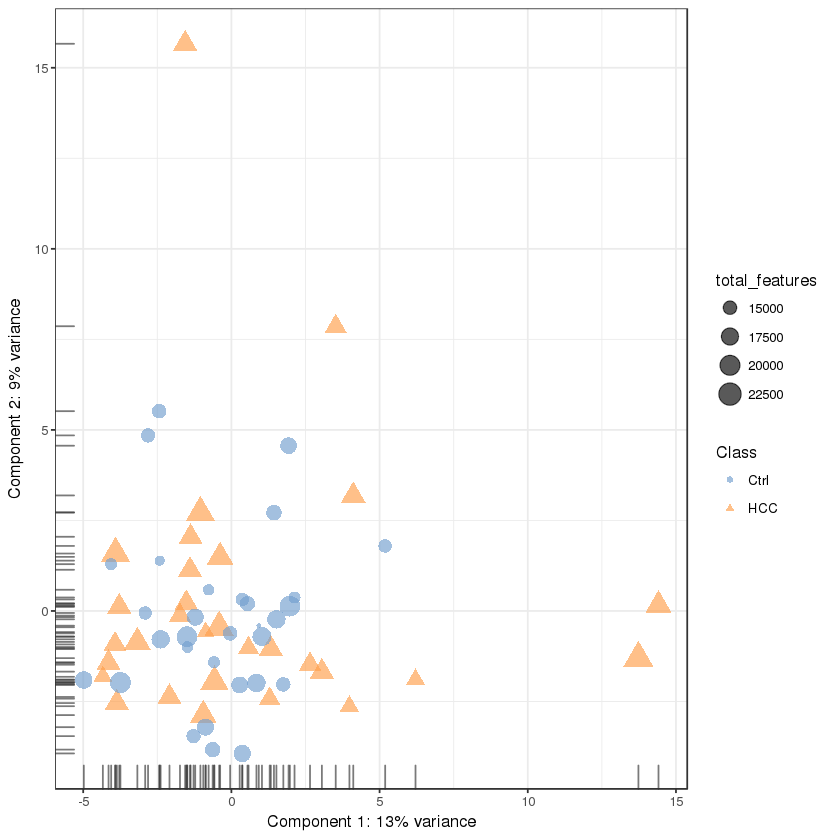

In [121]:
plotPCA(
    reads.qc.impute,
    exprs_values = "ruvs20",
    colour_by = "Class",
    shape_by = "Class",
    size_by = "total_features",
    ntop=100
)